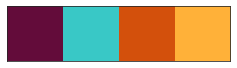

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [2]:
#number of points per group
n = 50

#define group labels and their centers
groups = {'A': (2,2),
          'B': (3,4),
          'C': (4,4),
          'D': (4,1)}

#create labeled x and y data
data = pd.DataFrame(index=range(n*len(groups)), columns=['x','y','label'])
for i, group in enumerate(groups.keys()):
    #randomly select n datapoints from a gaussian distrbution
    data.loc[i*n:((i+1)*n)-1,['x','y']] = np.random.normal(groups[group], 
                                                           [0.5,0.5], 
                                                           [n,2])
    #add group labels
    data.loc[i*n:((i+1)*n)-1,['label']] = group

data.head()

,x,y,label
0,1.958963,2.117398,A
1,2.14341,2.830868,A
2,2.642105,2.348155,A
3,1.827305,0.984328,A
4,2.17719,1.82402,A


In [6]:
data.label.value_counts()

C    50
B    50
A    50
D    50
Name: label, dtype: int64

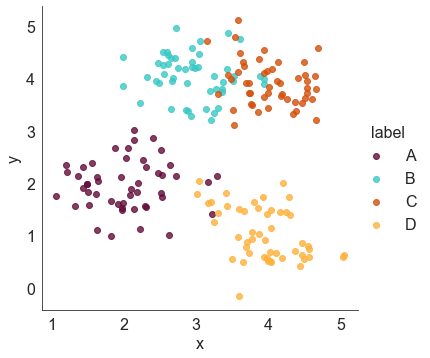

In [3]:
#plot data with seaborn
facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)